自己寫的方式

In [ ]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
data_dir = '../Data/
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
plt.plot(C1[:,0], C1[:,1], 'r>', label = 'Group A')
plt.plot(C2[:,0], C2[:,1],'b<', label = 'Group B')
# Estimatr the group parameters
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2

套件方式

/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/753551868.py:39: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/753551868.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\


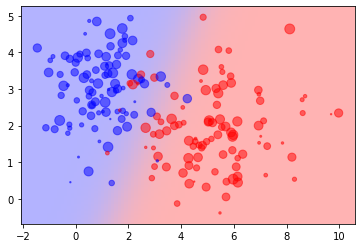

In [6]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
data_dir = '../Data/'
# D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小
plt.grid()

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])#ravel是把xx拉成一個向量,Lda.predict_proba為計算每一個點的後驗機率值且分成兩群
Z = Z[:, 1].reshape(xx.shape)#Z[:, 1]為第一群的後驗機率值
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)

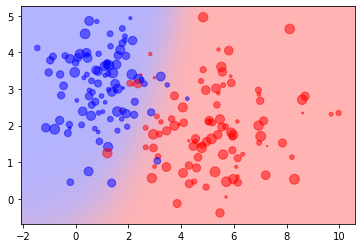

In [6]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis
data_dir = '../Data/'
# D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)